In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
# Define the file to explore
file='resumen-Nsim1099N_iter2000000N100B1S0.01.txt'

# Define the parameters for the simulation
N=100
beta=1
s=0.01
nu=-1/(beta+1)

# Import the data file
df=pd.read_csv(file, engine='python')
print(df.columns.tolist())
print('Theoretical exponent (nu)= %g'%nu)

['time', 'log_t', 'mean', 'logN', 'std_dev']
Theoretical exponent (nu)= -0.5


<Figure size 864x432 with 0 Axes>

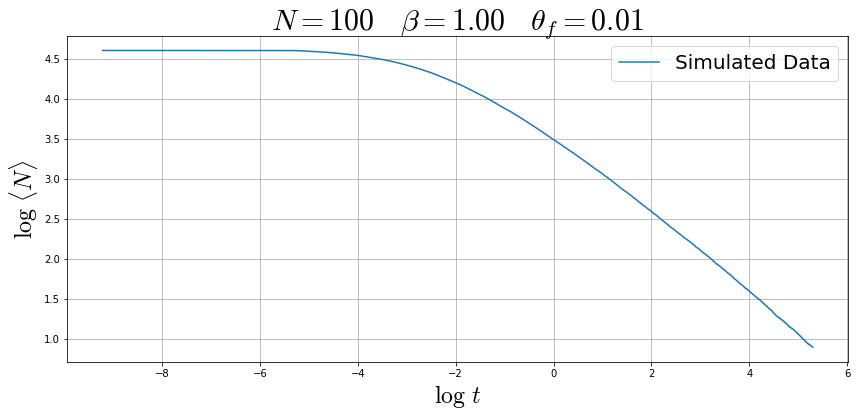

In [13]:
# Plot the entire log-data 
plt.figure(figsize=(14,6))

plt.plot(df.log_t,df.logN, label='Simulated Data')

plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [14]:
# Cut the data in order to analyze the last part
# The cut-value can be changed and will change the results
cut=2
df_tail=df[(df['log_t']>cut)]

# LINEAR REGRESSION FOR MEAN VALUE

In [15]:
# Perform the linear regression for the asymptotic behaviour of the mean values
X=df_tail['log_t']
y=df_tail['logN']

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
nu_res=results.params[1]

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   logN   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.996e+09
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        12:44:45   Log-Likelihood:             6.1293e+06
No. Observations:             1926109   AIC:                        -1.226e+07
Df Residuals:                 1926107   BIC:                        -1.226e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6868   4.31e-05   8.55e+04      0.0

# LINEAR REGRESSION FOR UPPER BOUND

In [16]:
# Perform the linear regression for the upper bound of the data
X=df_tail['log_t']
y=np.log(np.exp(df_tail['logN'])+df_tail['std_dev'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.205e+09
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        12:44:45   Log-Likelihood:             6.4749e+06
No. Observations:             1926109   AIC:                        -1.295e+07
Df Residuals:                 1926107   BIC:                        -1.295e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6746   3.61e-05   1.02e+05      0.0

# LINEAR REGRESSION FOR LOWER BOUND

In [17]:
# Perform the linear regression for the upper bound of the data
X=df_tail['log_t']
y=np.log(np.exp(df_tail['logN'])-df_tail['std_dev'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.452e+08
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        12:44:46   Log-Likelihood:             4.1927e+06
No. Observations:             1926109   AIC:                        -8.385e+06
Df Residuals:                 1926107   BIC:                        -8.385e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8645      0.000   3.28e+04      0.0

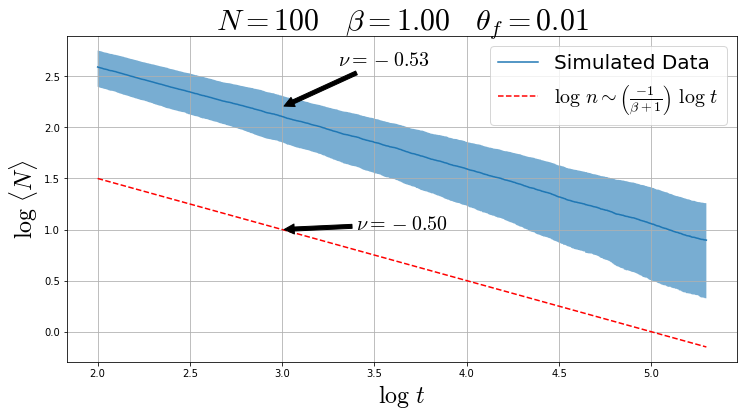

In [31]:
# Plot the partial data with the theoretical behaviour 
plt.figure(figsize=(12,6))

# Define the data for the theoretical behaviour comparison
xreg=np.linspace(min(df_tail.log_t),max(df_tail.log_t))
yreg=-(1.0/(beta+1.0))*xreg+2.5
plt.annotate(r'$\nu=%.2f$'%nu, 
             xy=(3, 1.0),
             xytext=(3.4,1.0),
             xycoords='data',
             arrowprops=dict(arrowstyle="simple",facecolor='black'),
             fontsize=20)

plt.plot(df_tail.log_t,df_tail.logN,label='Simulated Data')

ecu=r'$\log \ n \sim  \left( \frac{-1}{\beta+1} \right) \ \log \ t$'
plt.plot(xreg,yreg,'--',c='red',label=ecu)

upper=np.log(np.exp(df_tail['logN'])+(df_tail['std_dev']))
lower=np.log(np.exp(df_tail['logN'])-(df_tail['std_dev']))
plt.fill_between(df_tail.log_t,upper,lower,alpha=0.6)
plt.annotate(r'$\nu=%.2f$'%nu_res, 
             xy=(3, 2.2),
             xytext=(3.3,2.6),
             xycoords='data',
             arrowprops=dict(arrowstyle="simple",facecolor='black'),
             fontsize=20)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

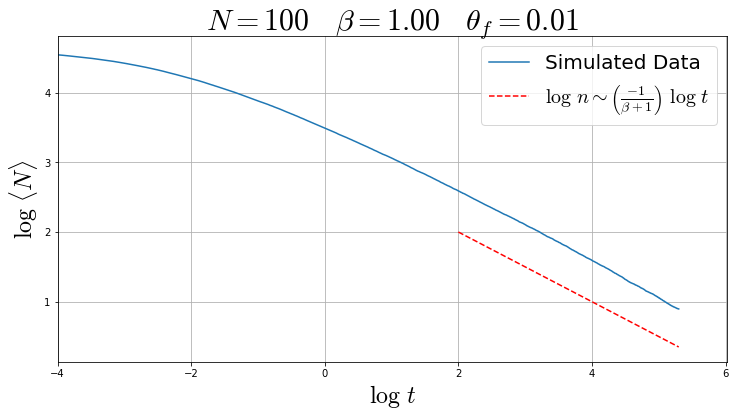

In [19]:
plt.figure(figsize=(12,6))

xreg=np.linspace(min(df_tail.log_t),max(df_tail.log_t))
yreg=-(1.0/(beta+1.0))*xreg+3.0

plt.plot(df.log_t,df.logN,label='Simulated Data')

ecu=r'$\log \ n \sim  \left( \frac{-1}{\beta+1} \right) \ \log \ t$'
plt.plot(xreg,yreg,'--',c='red',label=ecu)

plt.xlim(-4)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

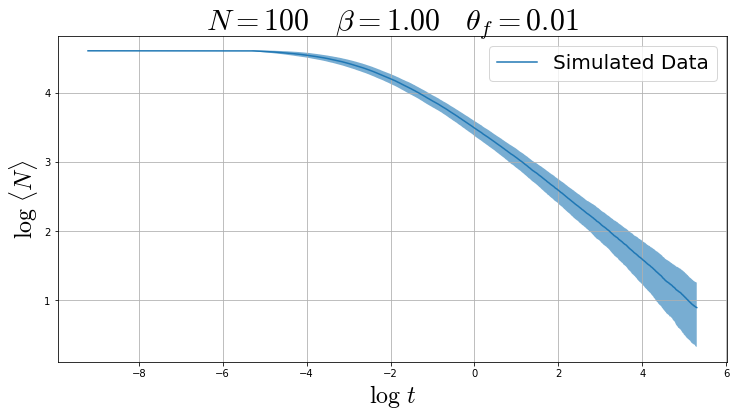

In [20]:
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.logN,label='Simulated Data')

upper=np.log(np.exp(df['logN'])+(df['std_dev']))
lower=np.log(np.exp(df['logN'])-(df['std_dev']))
plt.fill_between(df.log_t,upper,lower,alpha=0.6)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()